In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imgL=cv2.imread('left.png', cv2.IMREAD_GRAYSCALE)
imgR=cv2.imread('right.png', cv2.IMREAD_GRAYSCALE)

In [3]:
imgR.shape

(381, 433)

In [31]:
import os.path

# Generates a DisparityMsp and stores it into runResults as disparity.png
def generate_disparity_map(left_path, right_path, block_size, cmp_range):

    # image retrieval, pyramiding and gray-scale conversion
    gray_left = cv2.imread(os.path.join(left_path))
    gray_left = np.mean(gray_left, 2)

    gray_right = cv2.imread(os.path.join(right_path))
    gray_right = np.mean(gray_right, 2)
    # SIMPLE BLOCK MATCHING

    # creating a matrix storing the SAD (Sum of Absolute Difference)
    # for each pixel of the image, considering block_size X block_size blocks.
    # Result in a matrix with dimension reduced by block_size-1,
    # because no padding has been considered


    row_size, col_size = gray_right.shape
    disparity_matrix = np.ndarray(shape=(row_size - block_size + 1, col_size - block_size + 1), dtype=np.float32)
    disparity_matrix[:, :] = 0
    offset = block_size // 2

    # these outer loops iterate over the right image (one pixel at a time)
    for i in range(offset, row_size - offset):

        if i % 10 == 0:
            print('row' + str(i))

        for j in range(offset, col_size - offset):

            subl = gray_left[i - offset:i + offset + 1, j - offset:j + offset + 1]
            subr = gray_right[i - offset:i + offset + 1, j - offset:j + offset + 1]
            diff = abs(subl - subr)
            c1, c2, c3 = 0, sum(sum(diff)), 0
            d = 0
            max_col = min(col_size - j - offset - 1, cmp_range)

            for k in range(0, max_col):
                start_col = j + k - offset
                end_col = j + k + offset + 1
                subl = gray_left[i - offset:i + offset + 1, start_col:end_col]
                new_dist = sum(sum(abs(subr - subl)))

                if new_dist < c2:
                    c2 = new_dist
                    d = k

            disparity_matrix[i - offset, j - offset] = d
    disparity_matrix = disparity_matrix * np.power(2, downsample_n)


    # Plot the grid
    ax = sns.heatmap(disparity_matrix)
    fig = ax.get_figure()

    return disparity_matrix

In [ ]:
x=generate_disparity_map('left.png','right.png', 10, 50)

row10
row20
row30
row40
row50
row60
row70
row80
row90
row100
row110
row120
row130
row140
row150
row160
row170
row180
row190
row200
row210
row220
row230
row240
row250
row260


<Axes: >

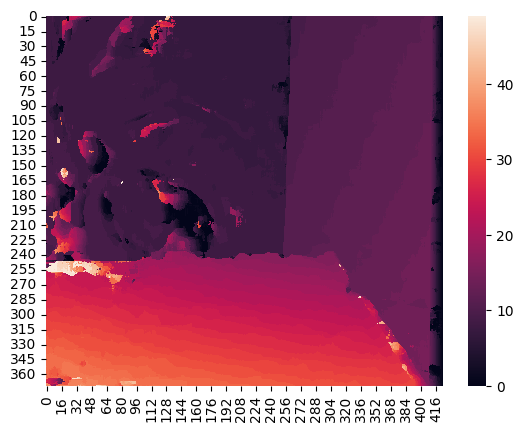

In [26]:
sns.heatmap(x)

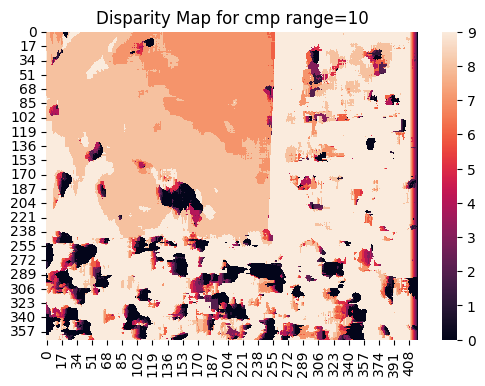

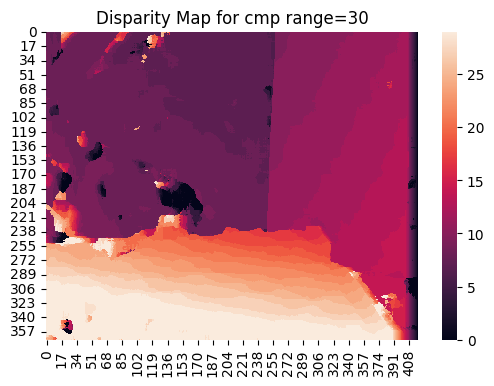

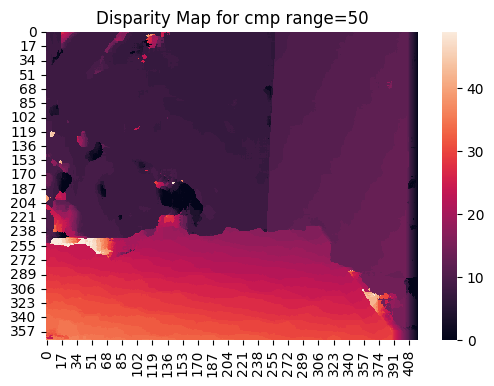

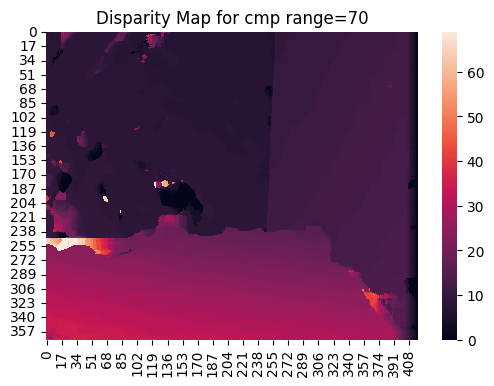

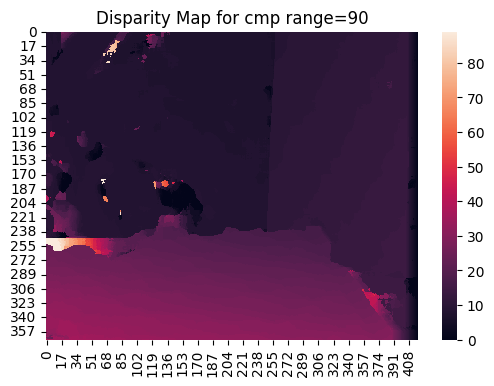

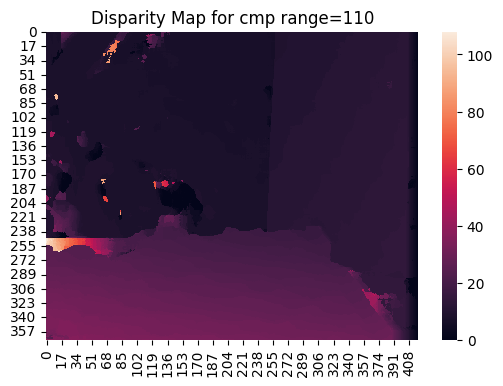

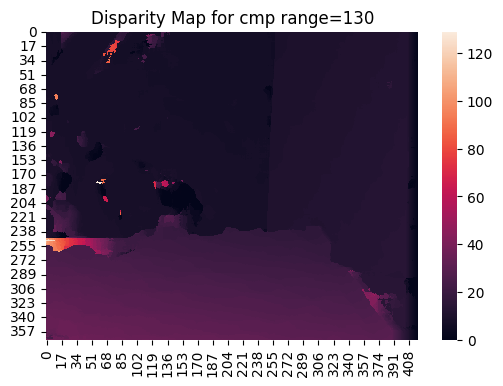

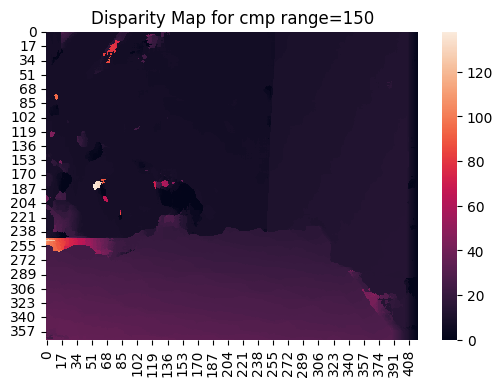

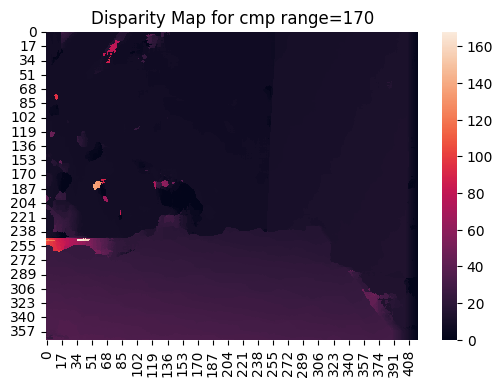

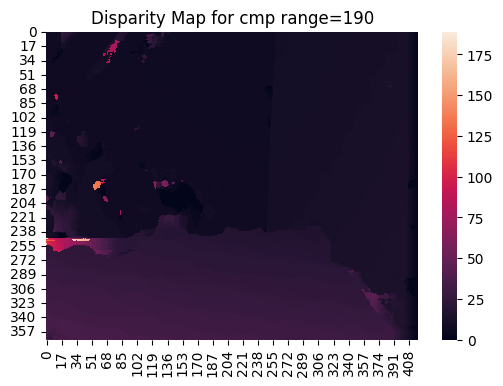

In [16]:
for i in range(10, 210, 20):
    x = generate_disparity_map('left.png', 'right.png', 'image', 15, i)
    plt.figure(figsize=(6, 4))
    sns.heatmap(x)
    plt.title(f'Disparity Map for cmp range={i}')
    plt.show()

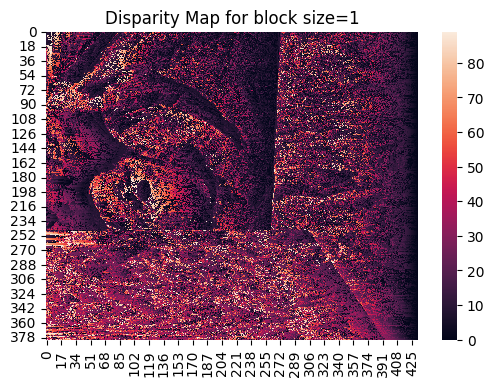

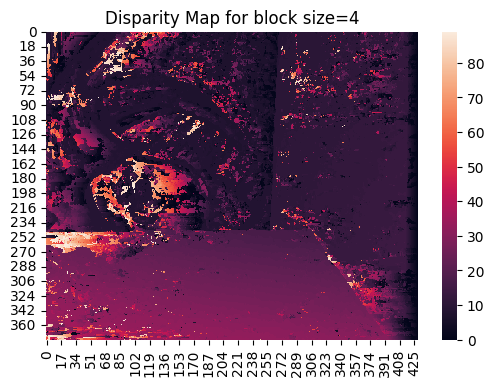

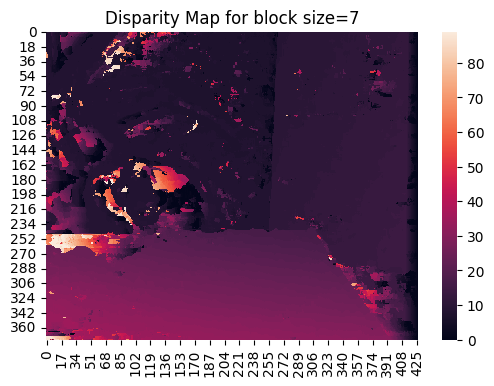

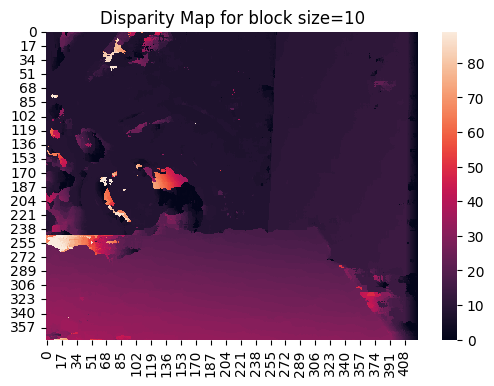

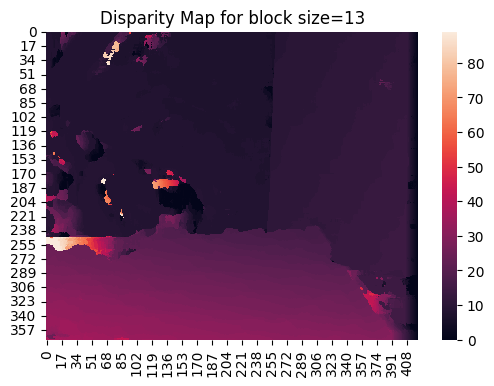

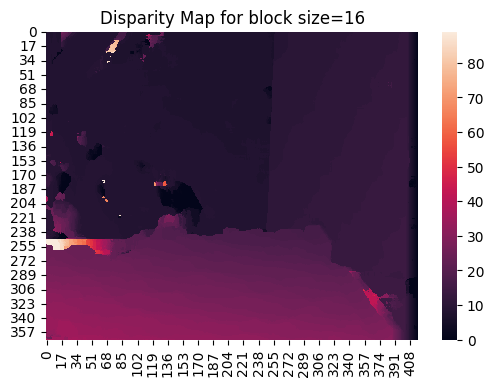

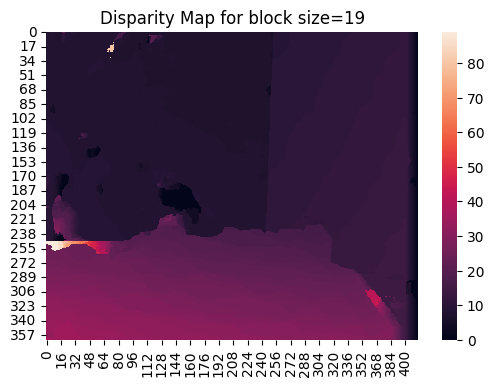

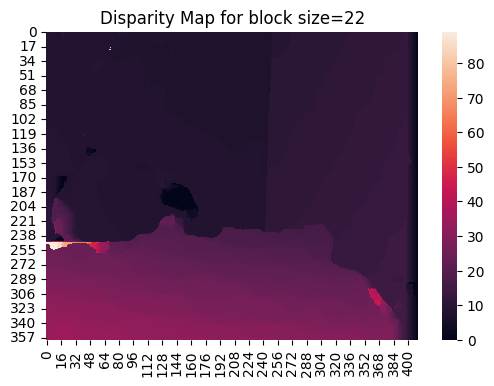

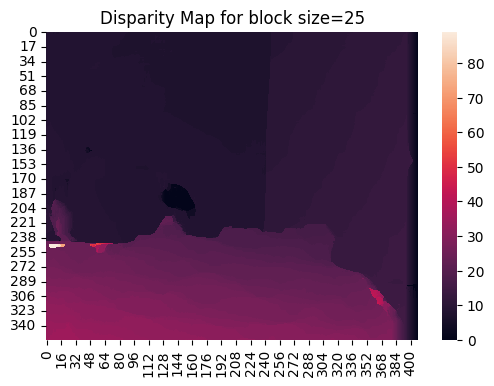

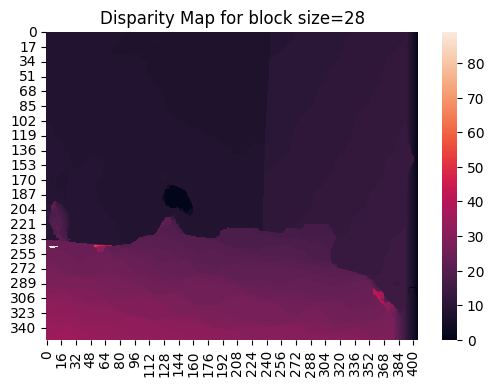

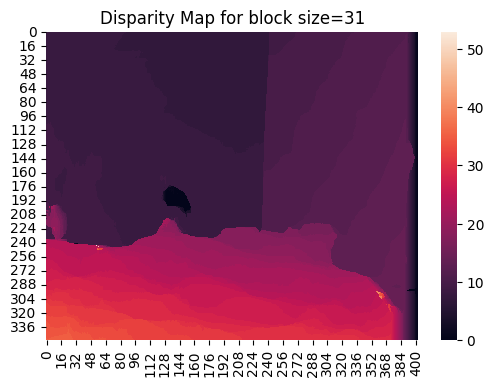

In [17]:
for i in range(1, 32, 3):
    x = generate_disparity_map('left.png', 'right.png', 'image', i, 90)
    plt.figure(figsize=(6, 4))
    sns.heatmap(x)
    plt.title(f'Disparity Map for block size={i}')
    plt.show()

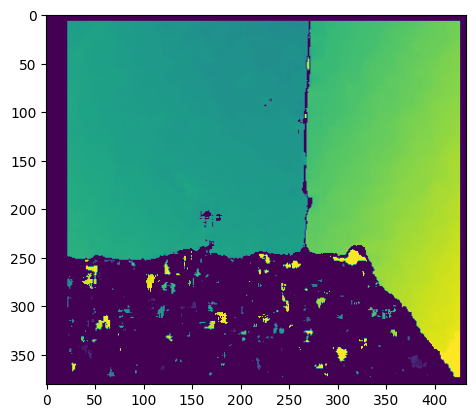

In [7]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity)
plt.show()